In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# Data Exploration

In [2]:
df=pd.read_csv('final_internship_data.csv')
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [4]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [5]:
# Remove user ID, user driver, Driver name, key, and pickup datetime

df = df.drop(['User ID', 'User Name', 'Driver Name','key','pickup_datetime'], axis=1) 

In [6]:
# Display the value counts for each categorical column in the DataFrame
for col in df.select_dtypes("object").columns:
    print(df[col].value_counts(), "\n\n********************************")

Car Condition
Very Good    125312
Bad          124978
Good         124968
Excellent    124742
Name: count, dtype: int64 

********************************
Weather
sunny     100433
cloudy    100062
rainy      99972
stormy     99955
windy      99578
Name: count, dtype: int64 

********************************
Traffic Condition
Congested Traffic    166847
Dense Traffic        166584
Flow Traffic         166569
Name: count, dtype: int64 

********************************


In [7]:
df['year'].value_counts()

year
2012    80225
2011    79529
2013    78034
2009    77002
2010    75791
2014    74608
2015    34811
Name: count, dtype: int64

In [8]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


There are 0 distance and negative values for fare amount and passenger count

In [9]:
 coulmn_has_wrong_data=['fare_amount','passenger_count','distance']
for col in coulmn_has_wrong_data:
    df = df[df[col] > 0]
df.reset_index(drop=True, inplace=True)

## Data Cleaning

In [10]:
# Remove the cols with null values
df=df.dropna()

In [11]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [12]:
df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [13]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000,483950.000000
mean,11.362586,-1.288902,0.709490,-1.288945,0.709422,1.690584,13.511987,15.681434,6.271497,3.042019,2011.745166,75.646031,69.514144,53.407693,52.752827,45.021375,19.817421,0.305731
std,9.790614,0.117817,0.106353,0.115927,0.089398,1.306663,6.509960,8.681670,3.438339,1.948688,1.866989,794.570443,796.300324,796.220667,796.428940,796.669496,369.998746,1.830139
min,0.010000,-52.119764,-54.389440,-59.049665,-44.676047,1.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.143207,0.000084,-3.141593
25%,6.000000,-1.291409,0.710985,-1.291396,0.710968,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.320911,32.124720,17.056919,14.815953,7.079275,1.281789,-0.896055
50%,8.500000,-1.291231,0.711280,-1.291205,0.711289,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.487519,34.675639,19.510130,18.212602,10.330182,2.183334,-0.124425
75%,12.500000,-1.290992,0.711526,-1.290938,0.711543,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.690631,38.063660,22.041925,22.149009,14.182057,3.977564,2.253950
max,495.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


## EDA

In [14]:
df.tail()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
483945,Bad,rainy,Dense Traffic,7.0,-1.291173,0.711514,-1.290951,0.711371,1,18,...,5,3,2015,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
483946,Very Good,rainy,Flow Traffic,13.7,-1.291595,0.710670,-1.291708,0.710540,1,12,...,9,0,2010,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
483947,Bad,rainy,Flow Traffic,25.0,-1.291262,0.710796,-1.289737,0.710366,1,0,...,8,0,2014,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
483948,Good,stormy,Congested Traffic,6.5,-1.291101,0.711335,-1.291023,0.711480,6,12,...,1,0,2015,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817
483949,Very Good,sunny,Flow Traffic,4.9,-1.291312,0.710736,-1.291243,0.710582,1,23,...,4,0,2010,38.822968,31.517592,23.087427,11.950577,3.873636,1.040272,-2.813690


<function matplotlib.pyplot.show(close=None, block=None)>

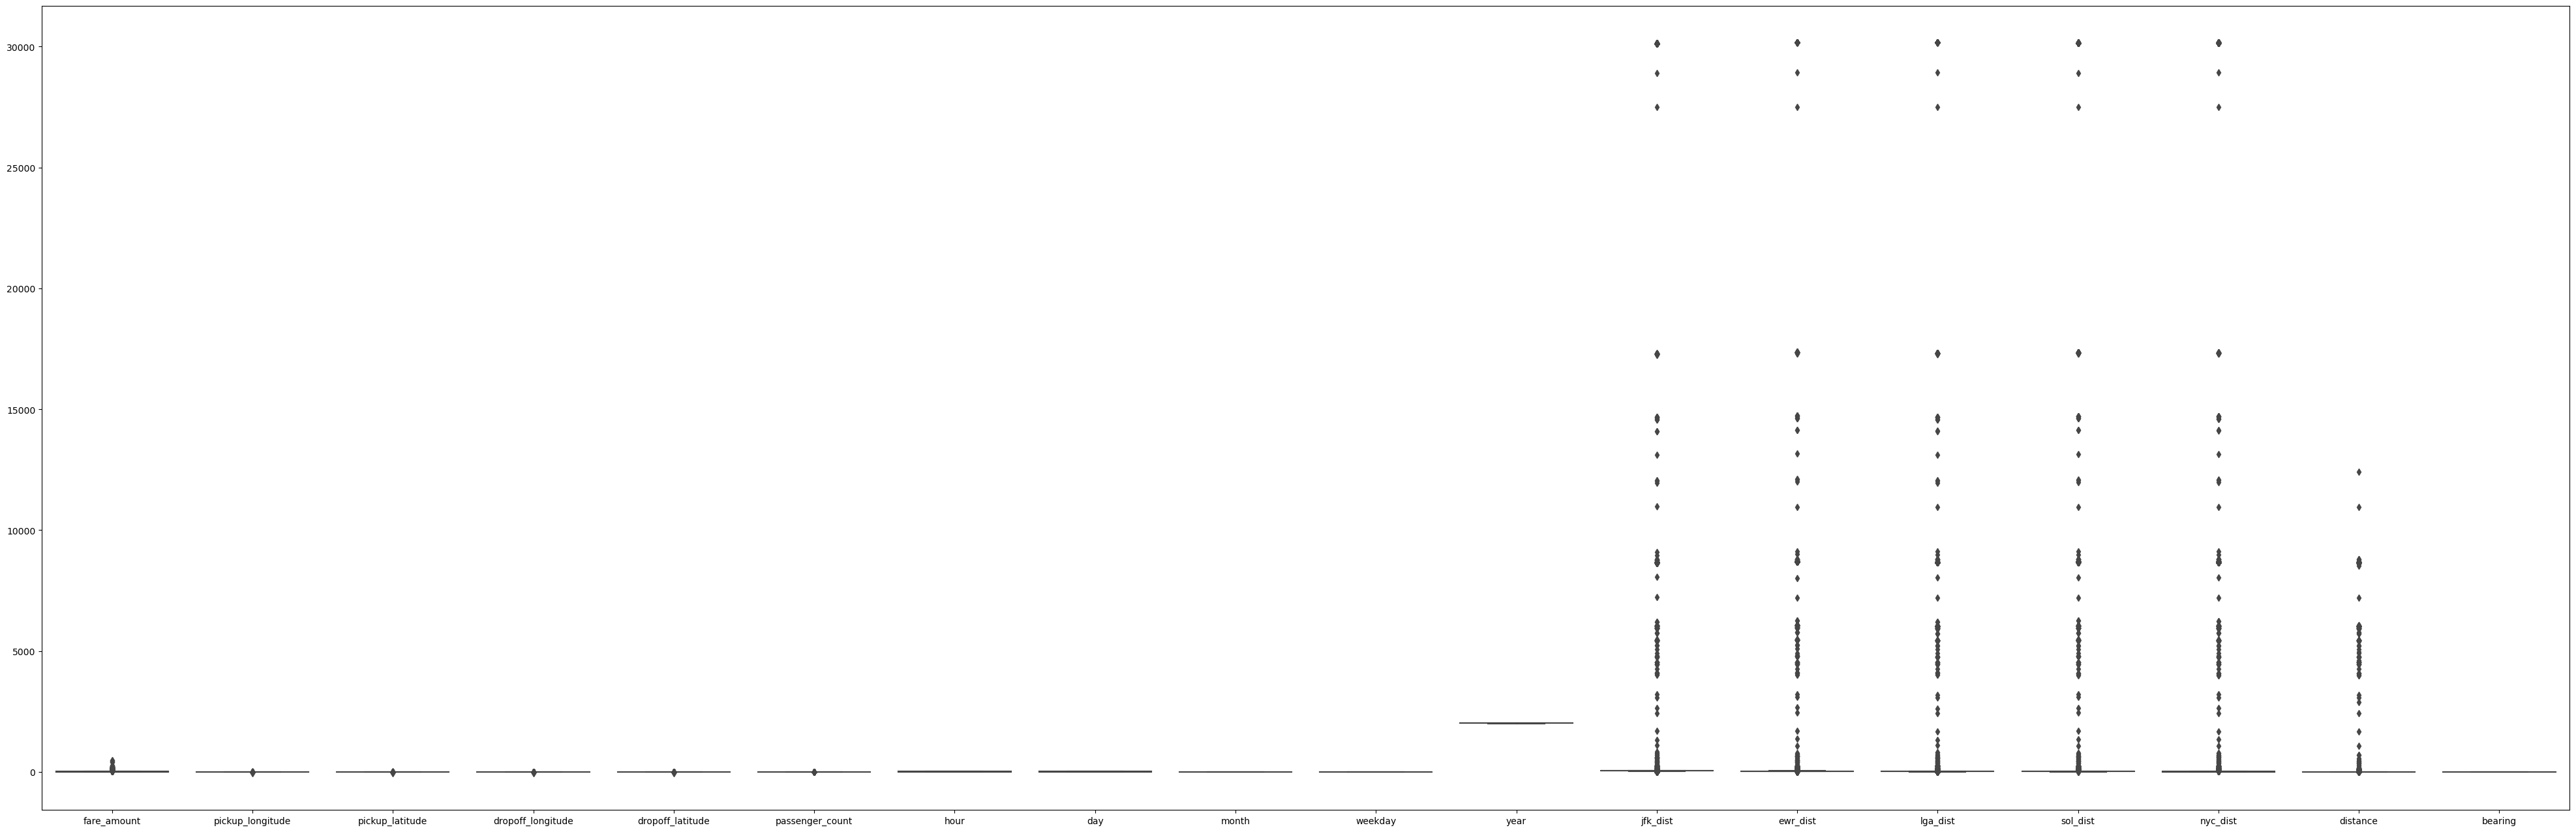

In [15]:
# Check and handling Outlier
fig, ax = plt.subplots(figsize=(50,16))
sns.boxplot(data=df, orient="v")
plt.show


In [16]:
def handle_outliers(data, method='iqr', threshold=1.5, columns=None):
    """
    Handle outliers in numerical columns of a DataFrame.

    Parameters:
    - data: DataFrame or Series
    - method: 'iqr' for interquartile range, 'z-score' for z-score method
    - threshold: Number of standard deviations for z-score method or a multiplier for IQR method
    - columns: List of columns to handle outliers (default is all columns)

    Returns:
    DataFrame or Series without outliers based on the specified method and threshold.
    """
    if columns is None:
        columns = data.columns if isinstance(data, pd.DataFrame) else [data.name]

    if method == 'iqr':
        for column in columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    elif method == 'z-score':
        for column in columns:
            z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
            data = data[z_scores <= threshold]

    return data


In [17]:
df=handle_outliers(data=df,columns=['jfk_dist','ewr_dist','lga_dist','sol_dist','nyc_dist','distance','fare_amount'])

In [18]:
df.shape

(389977, 21)

<function matplotlib.pyplot.show(close=None, block=None)>

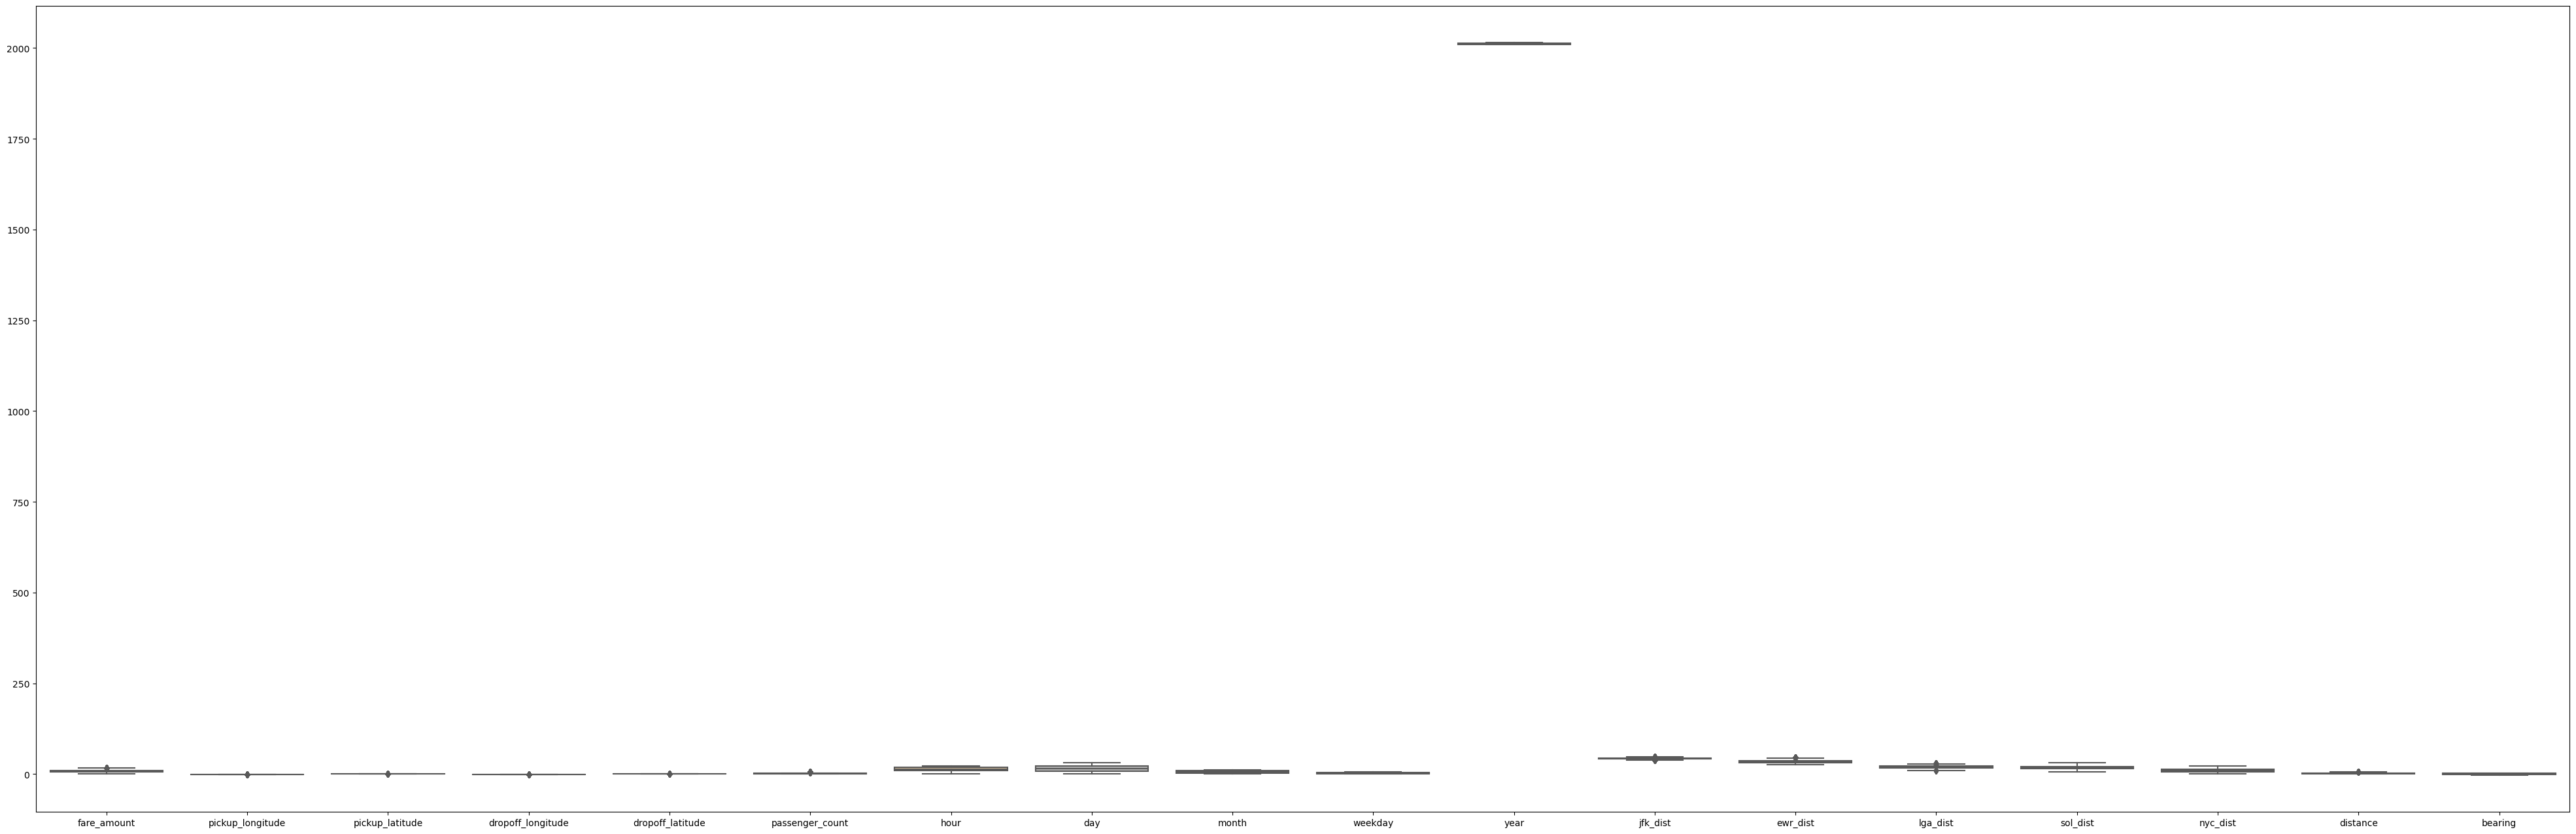

In [19]:
fig, ax = plt.subplots(figsize=(50,16))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show

In [20]:
df.shape

(389977, 21)

C:\Users\moham\AppData\Local\Temp\ipykernel_17936\119181056.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


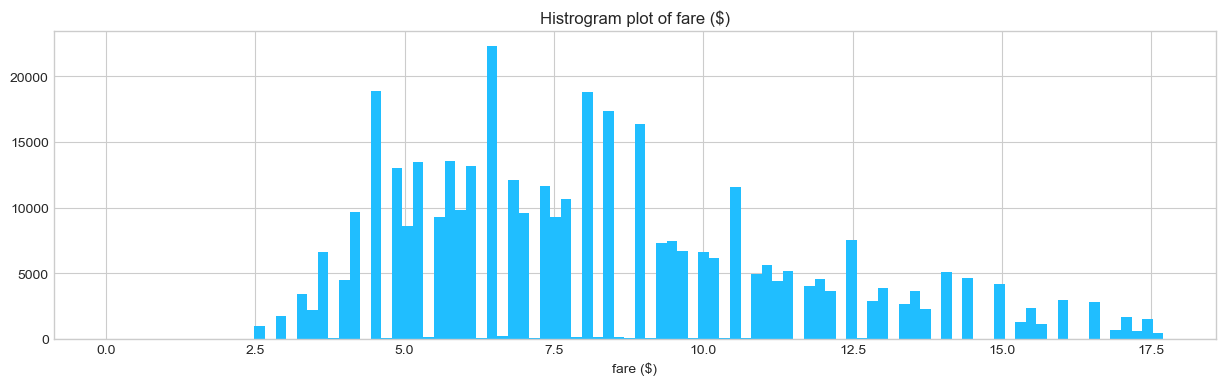

In [21]:
# Histogram plot for fare price
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,4))
plt.hist(df['fare_amount'], bins=100, color='#20beff')
plt.xlabel("fare ($)")
plt.title("Histrogram plot of fare ($)")
plt.show()

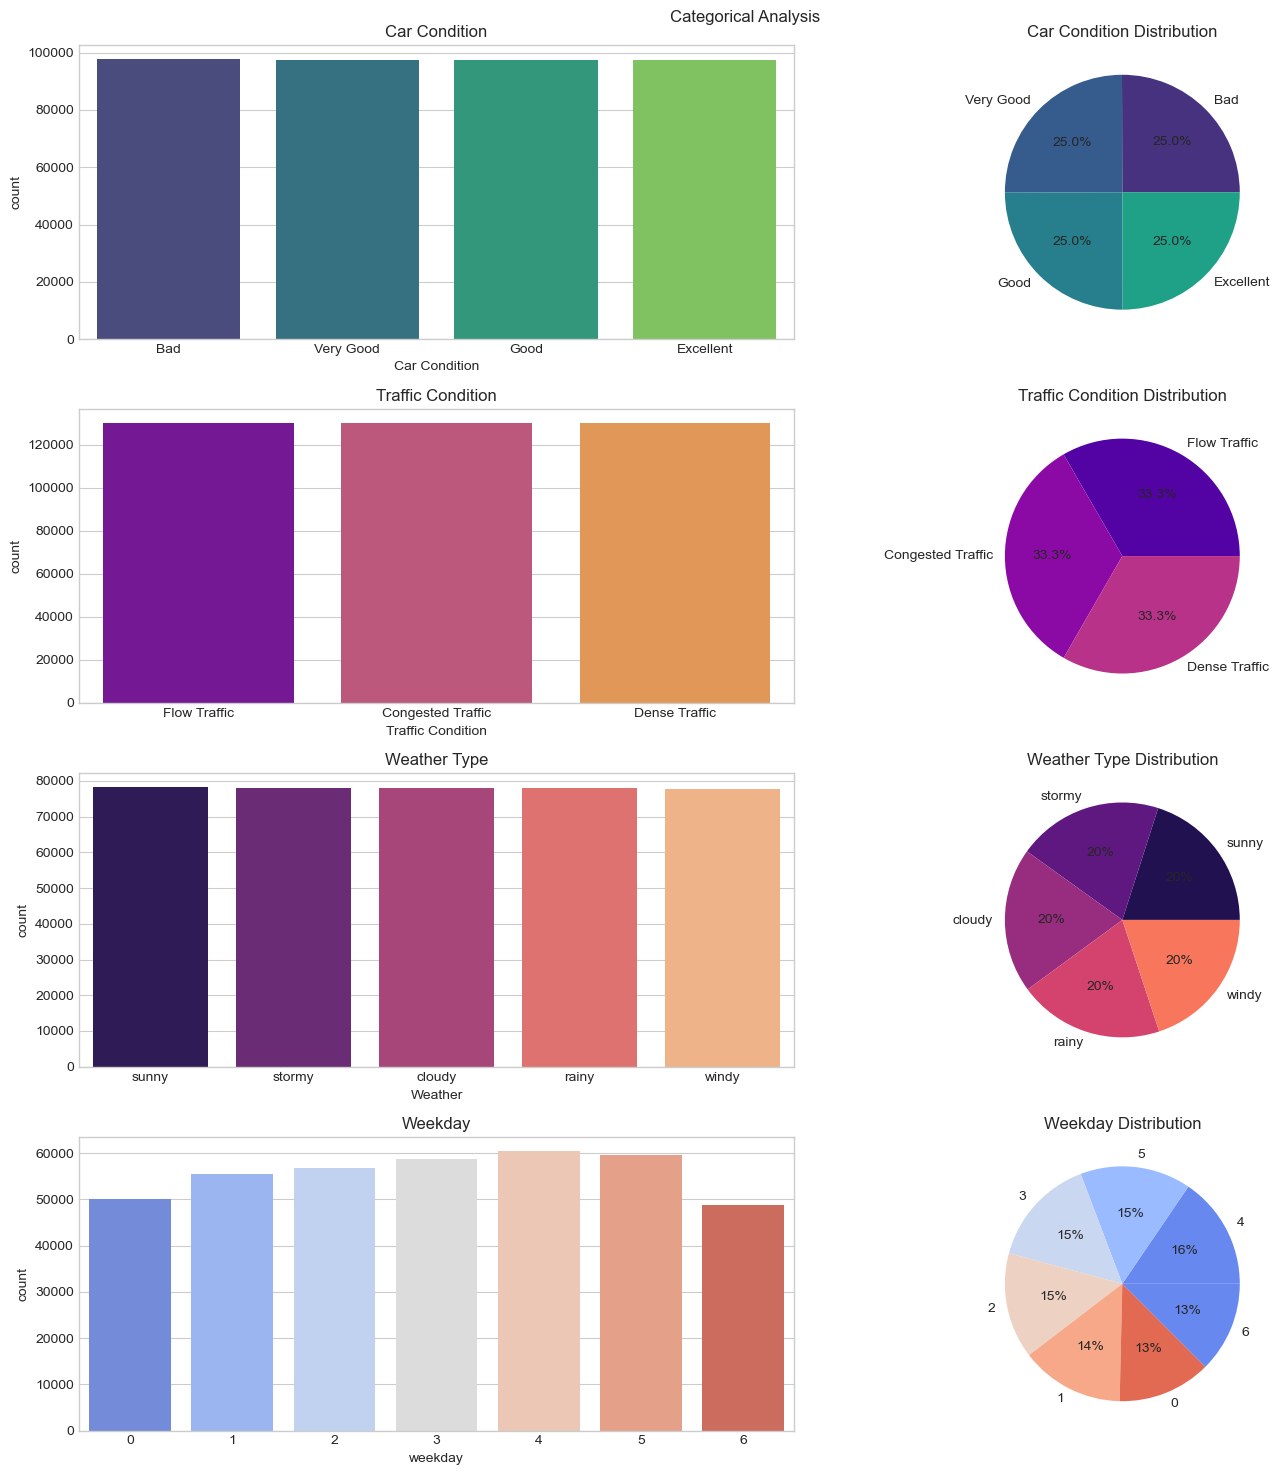

In [22]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

# Car Condition
car_condition_counts = df['Car Condition'].value_counts()
sns.barplot(x=car_condition_counts.index, y=car_condition_counts,palette="viridis", ax=ax[0, 0])
ax[0, 0].set_title('Car Condition')
ax[0, 1].pie(car_condition_counts, labels=car_condition_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
ax[0, 1].set_title('Car Condition Distribution')

# Traffic Condition
traffic_condition_counts = df['Traffic Condition'].value_counts()
sns.barplot(x=traffic_condition_counts.index, y=traffic_condition_counts, palette="plasma", ax=ax[1, 0])
ax[1, 0].set_title('Traffic Condition')
ax[1, 1].pie(traffic_condition_counts, labels=traffic_condition_counts.index, autopct='%1.1f%%', colors=sns.color_palette("plasma"))
ax[1, 1].set_title('Traffic Condition Distribution')

# Weather Type
weather_counts = df['Weather'].value_counts()
sns.barplot(x=weather_counts.index, y=weather_counts, palette="magma", ax=ax[2, 0])
ax[2, 0].set_title('Weather Type')
ax[2, 1].pie(weather_counts, labels=weather_counts.index, autopct='%1.0f%%', colors=sns.color_palette("magma"))
ax[2, 1].set_title('Weather Type Distribution')

# Weekday Analysis
weekday_counts = df['weekday'].value_counts()
sns.barplot(x=weekday_counts.index, y=weekday_counts, palette="coolwarm", ax=ax[3, 0])
ax[3, 0].set_title('Weekday')
ax[3, 1].pie(weekday_counts, labels=weekday_counts.index, autopct='%1.0f%%', colors=sns.color_palette("coolwarm"))
ax[3, 1].set_title('Weekday Distribution')

fig.suptitle('Categorical Analysis')
plt.tight_layout()
plt.show()

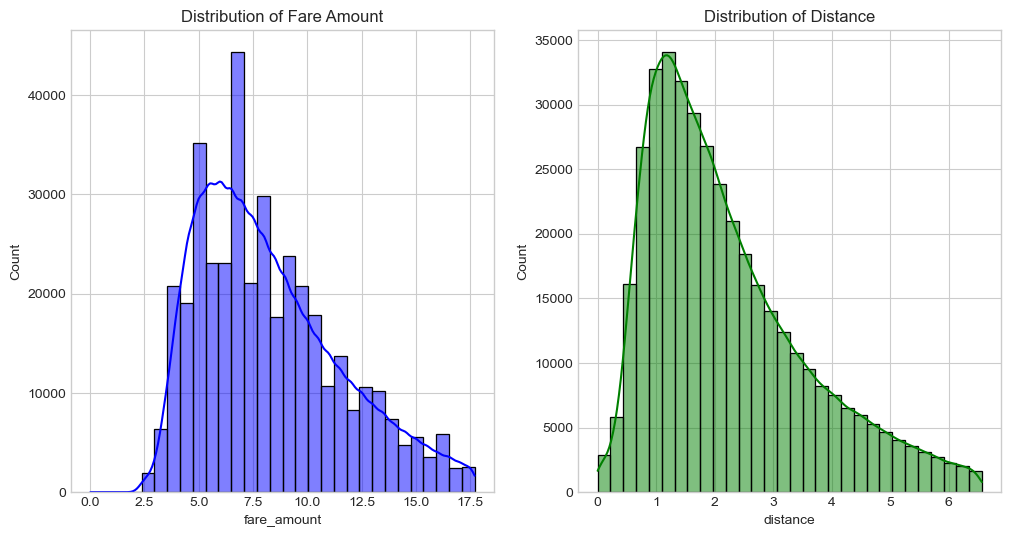

In [23]:
# Histograms for numerical variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['fare_amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Fare Amount')

plt.subplot(1, 2, 2)
sns.histplot(df['distance'], bins=30, kde=True, color='green')
plt.title('Distribution of Distance')

plt.show()

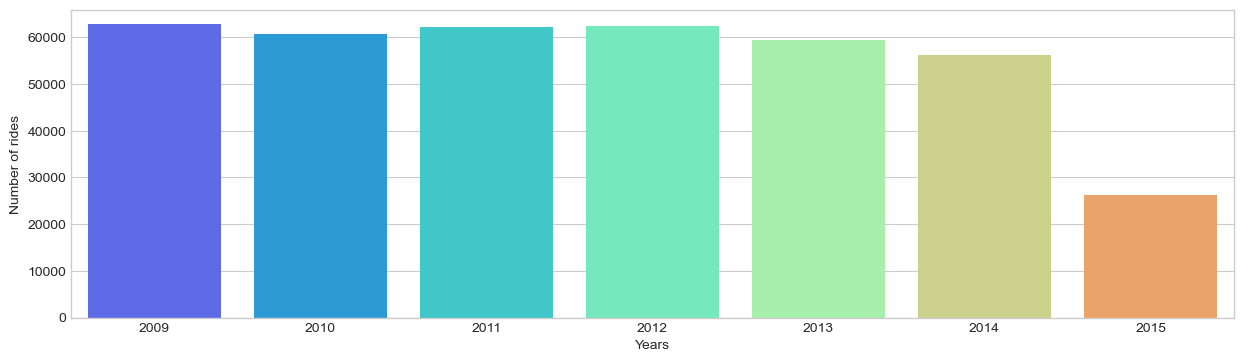

In [24]:
# Barplot for visualizing the number of rides in the following years
year_insight = df.year.value_counts()
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x=year_insight.index, y=year_insight.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Years")
plt.show()

In [25]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

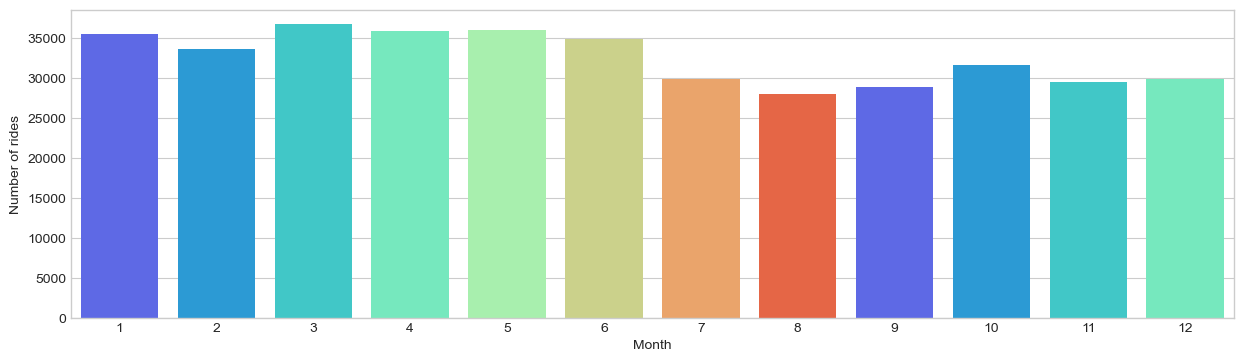

In [26]:
# Datetime features
month_insight = df.month.value_counts()
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x=month_insight.index, y=month_insight.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Month")
plt.show()

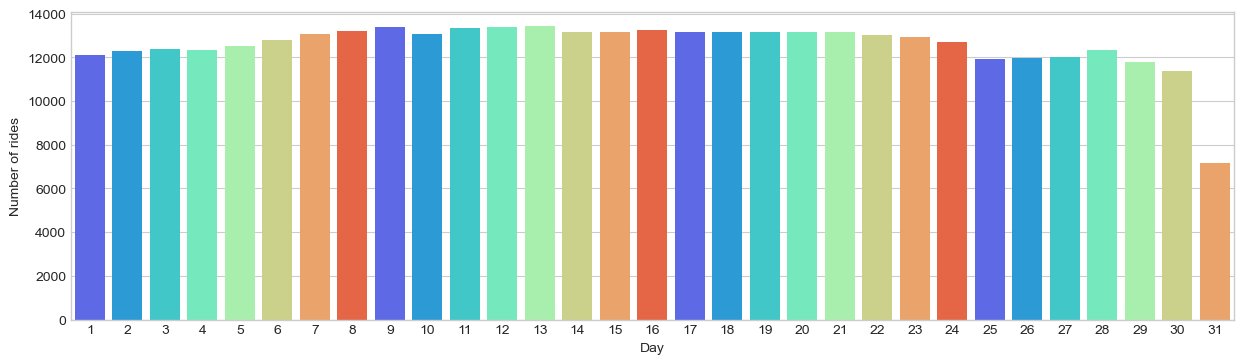

In [27]:
# Day
day = df.day.value_counts()
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x=day.index, y=day.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Day")
plt.show()

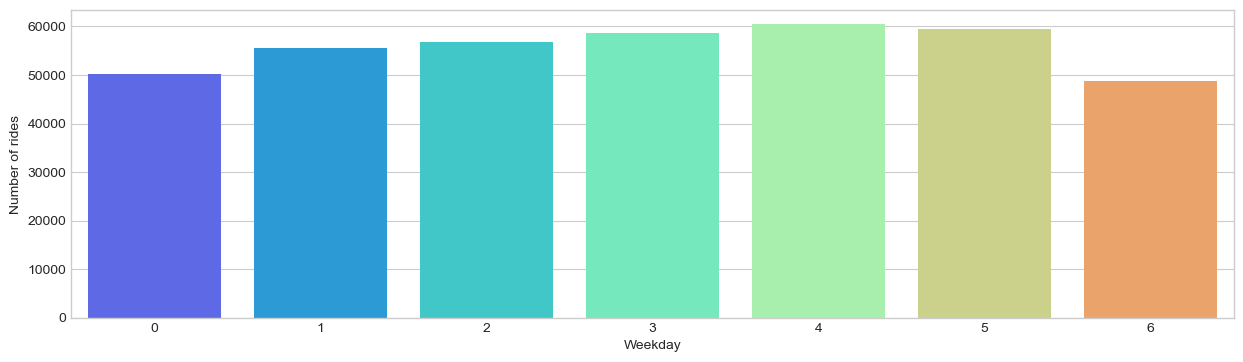

In [28]:
weekday = df.weekday.value_counts()
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x=weekday.index, y=weekday.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Weekday")
plt.show()

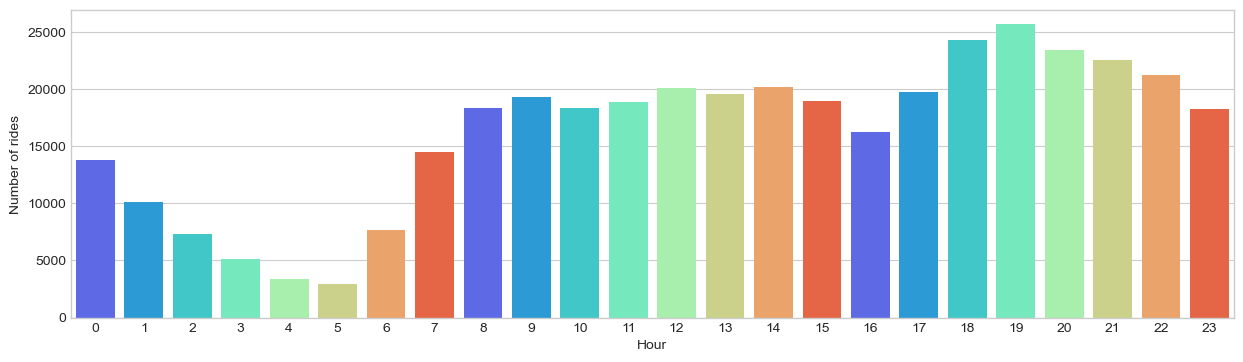

In [29]:
hour = df.hour.value_counts()
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x=hour.index, y=hour.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Hour")
plt.show()

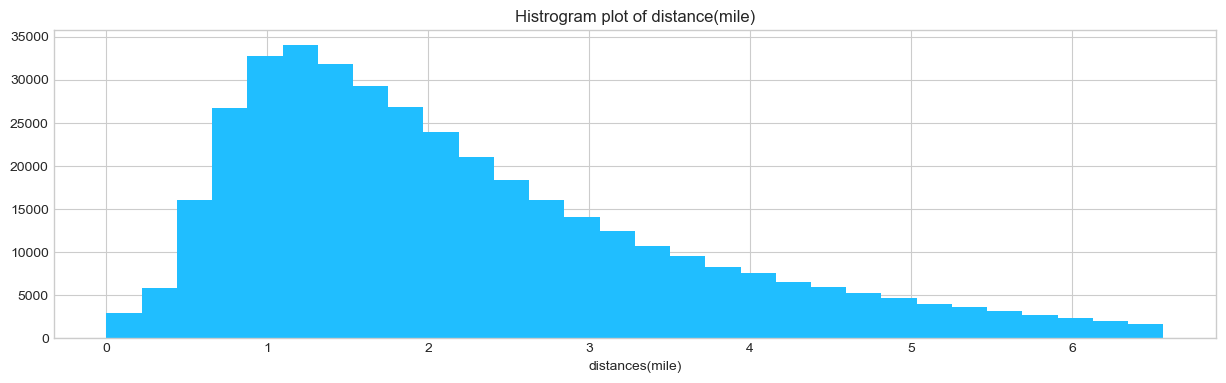

In [30]:
df.distance.hist(bins=30, figsize=(15,4), color='#20beff')
plt.xlabel("distances(mile)")
plt.title("Histrogram plot of distance(mile)")
plt.show()

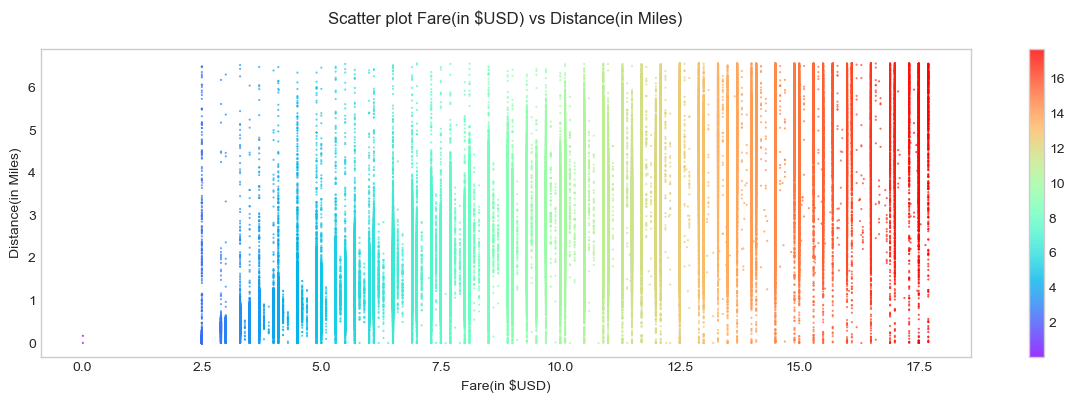

In [31]:
plt.figure(figsize=(15,4))

plt.scatter(df.fare_amount, df.distance, c=df.fare_amount, 
            cmap=plt.cm.rainbow, alpha=0.8, s=1, marker=".")
plt.xlabel("Fare(in $USD)")
plt.ylabel("Distance(in Miles)")
plt.title("Scatter plot Fare(in $USD) vs Distance(in Miles)\n")
ol = plt.grid(False)
plt.colorbar(ol)
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_17936\3516714725.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
C:\Users\moham\AppData\Local\Temp\ipykernel_17936\3516714725.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

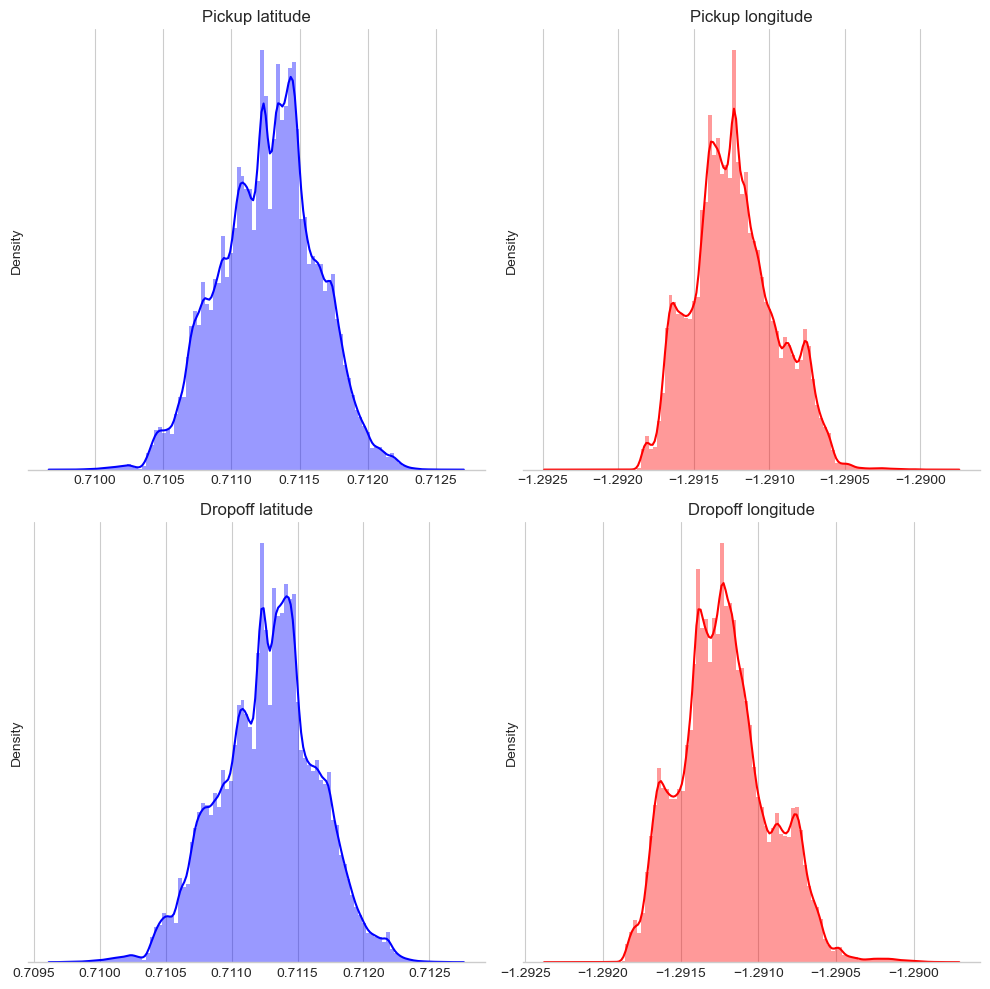

In [33]:
f, axes = plt.subplots(2,2,figsize=(10, 10))
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
axes[0,0].set_title('Pickup latitude')
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
axes[0,1].set_title('Pickup longitude')
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1,0])
axes[1,0].set_title('Dropoff latitude')
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
axes[1,1].set_title('Dropoff longitude')
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

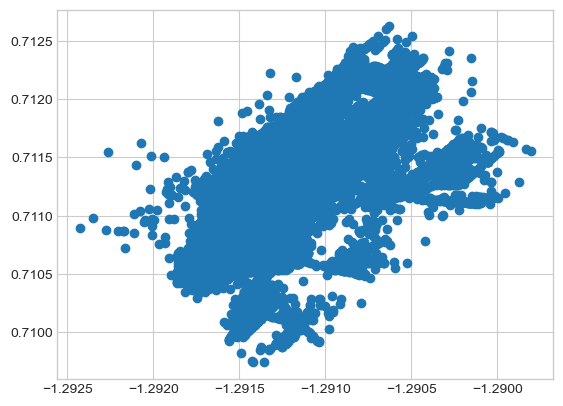

In [34]:
plt.scatter(x=df['pickup_longitude'], y=df['pickup_latitude'])
plt.show()

In [35]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

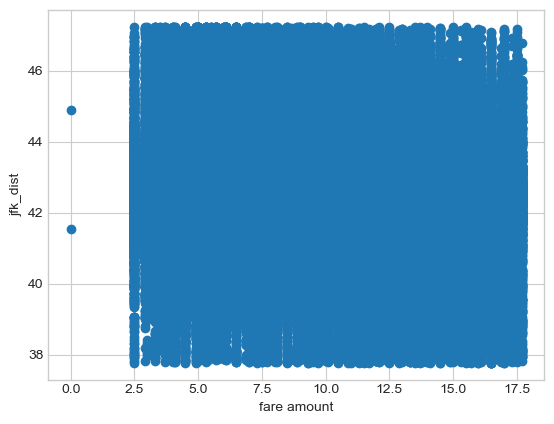

In [36]:
plt.scatter(x=df['fare_amount'], y=df['jfk_dist'])
plt.xlabel('fare amount')
plt.ylabel('jfk_dist')
plt.show()


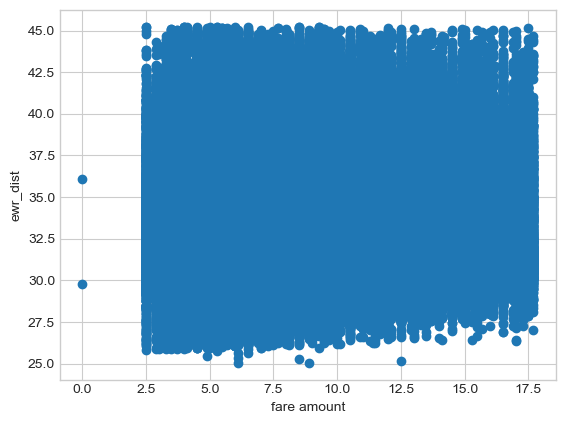

In [37]:
plt.scatter(x=df['fare_amount'], y=df['ewr_dist'])
plt.xlabel('fare amount')
plt.ylabel('ewr_dist')
plt.show()


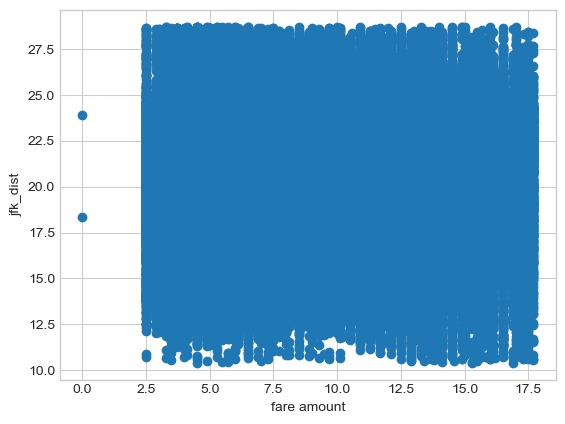

In [38]:
plt.scatter(x=df['fare_amount'], y=df['lga_dist'])
plt.xlabel('fare amount')
plt.ylabel('jfk_dist')
plt.show()


## Label Encoding

In [39]:
# Display unique values for each categorical column
categorical_columns = df.select_dtypes("object").columns

for column in categorical_columns:
    print(column, " : ", df[column].unique(), " \n\n ************************************************\n")

Car Condition  :  ['Bad' 'Very Good' 'Excellent' 'Good']  

 ************************************************

Weather  :  ['stormy' 'sunny' 'windy' 'rainy' 'cloudy']  

 ************************************************

Traffic Condition  :  ['Congested Traffic' 'Flow Traffic' 'Dense Traffic']  

 ************************************************



In [40]:
# Lbel Encoder
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder to encode categorical columns
encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])


In [41]:
# Display unique values for specific categorical columns
for column in ['Car Condition', 'Weather', 'Traffic Condition']:
    print(column, " : ", df[column].unique(), " \n\n ************************************************\n")

Car Condition  :  [0 3 1 2]  

 ************************************************

Weather  :  [2 3 4 1 0]  

 ************************************************

Traffic Condition  :  [0 2 1]  

 ************************************************



week day  :  [ 0  Monday , 1 Tuesday ,  3 Thursday , 5 Saturday ,  2 Wednesday , 6 Sunday,  4 Friday ]

**********************************************

## Feature selection

<Axes: >

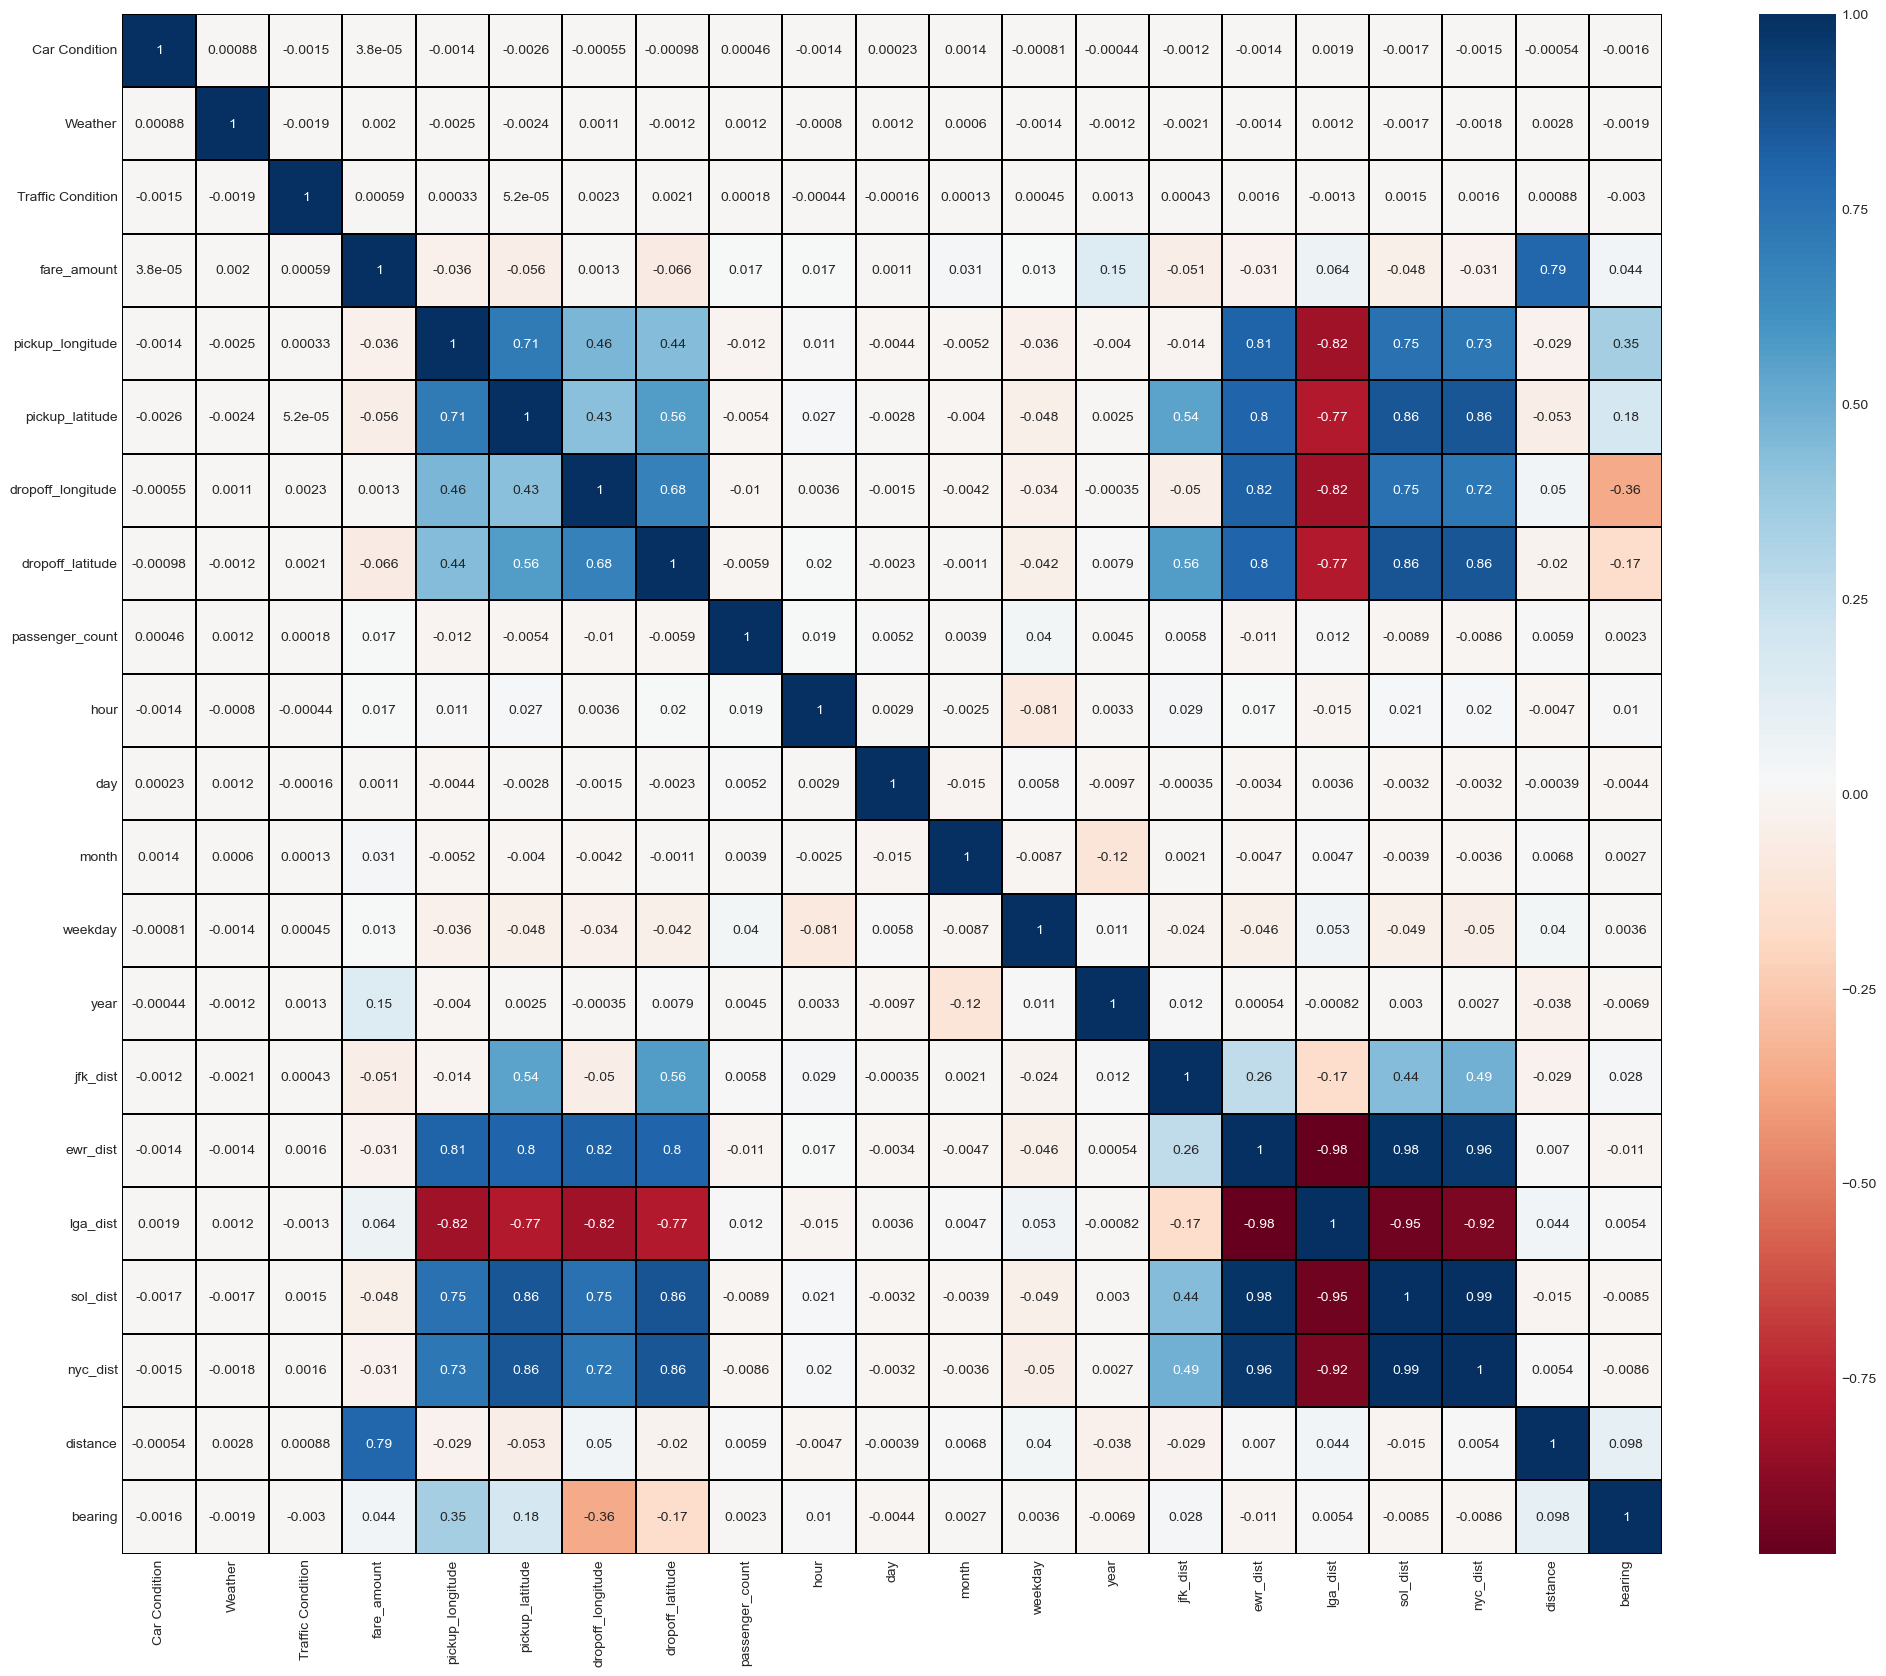

In [42]:
# Selecting Relevant Features
corrMatrix_1 = df.corr()

fig, ax = plt.subplots(figsize=(25,20))
#sns.heatmap(corrMatrix_1, annot=True)
sns.heatmap(corrMatrix_1, annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")


In [45]:
# Correlation with output variable
cor_target = abs(corrMatrix_1["fare_amount"])

# Selecting highly correlated features : 0.001
relevant_features = cor_target[(cor_target >= 0.001) | (cor_target <= -0.001)]
print("relevant_features : ",relevant_features.shape,"\n",relevant_features)

print("-----------------------------------------------------------------------")
lst_columns = relevant_features.index.to_list()

df2 = pd.DataFrame(df, columns= lst_columns)

print("-----------------------------------------------------------------------")
my_cols = df2.columns.to_list()
print("List the column names : ",len(my_cols),"\n",my_cols)


relevant_features :  (19,) 
 Weather              0.002038
fare_amount          1.000000
pickup_longitude     0.036445
pickup_latitude      0.056141
dropoff_longitude    0.001302
dropoff_latitude     0.066496
passenger_count      0.016852
hour                 0.016656
day                  0.001148
month                0.030777
weekday              0.012531
year                 0.149941
jfk_dist             0.050783
ewr_dist             0.031149
lga_dist             0.063816
sol_dist             0.047772
nyc_dist             0.030920
distance             0.793035
bearing              0.043871
Name: fare_amount, dtype: float64
-----------------------------------------------------------------------
-----------------------------------------------------------------------
List the column names :  19 
 ['Weather', 'fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 

In [46]:
df2.shape

(389977, 19)

In [47]:
df2.head()

,Weather,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
2,2,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,2,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,2,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
5,3,12.1,-1.291560,0.710901,-1.291071,0.711365,1,9,6,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251
6,4,7.5,-1.291195,0.711251,-1.291086,0.711481,1,20,20,11,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260


## Export Data

In [49]:
df2.to_csv(r"C:\Users\moham\OneDrive\Documents\Mohamed's Track\Internships Projects\Cellula\second project\modeling\All models\processed data\data.csv",index=False)
